In [4]:
from PIL import Image
from transformers import TrOCRProcessor, VisionEncoderDecoderModel, AutoProcessor
import torch
import glob, os

In [ ]:
# input_img = "./img.jpg"
# input_img = "./output/CD-03.jpg"
# image = Image.open(input_img).convert("RGB")
# image

In [13]:
processor = TrOCRProcessor.from_pretrained("microsoft/trocr-base-handwritten")
# calling the processor is equivalent to calling the feature extractor
# pixel_values = processor(image, return_tensors="pt").pixel_values
# print(pixel_values.shape)

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.48, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


In [14]:
model = VisionEncoderDecoderModel.from_pretrained("microsoft/trocr-base-handwritten")

Config of the encoder: <class 'transformers.models.vit.modeling_vit.ViTModel'> is overwritten by shared encoder config: ViTConfig {
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "image_size": 384,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "model_type": "vit",
  "num_attention_heads": 12,
  "num_channels": 3,
  "num_hidden_layers": 12,
  "patch_size": 16,
  "qkv_bias": false,
  "transformers_version": "4.48.0"
}

Config of the decoder: <class 'transformers.models.trocr.modeling_trocr.TrOCRForCausalLM'> is overwritten by shared decoder config: TrOCRConfig {
  "activation_dropout": 0.0,
  "activation_function": "gelu",
  "add_cross_attention": true,
  "attention_dropout": 0.0,
  "bos_token_id": 0,
  "classifier_dropout": 0.0,
  "cross_attention_hidden_size": 768,
  "d_model": 1024,
  "decoder_attention_heads": 16,
  "decoder_ffn_dim": 4096,
  "decoder

In [ ]:
# generated_ids = model.generate(pixel_values)
# generated_text = processor.batch_decode(generated_ids)[0]
# print(generated_text)

</s>1952 53</s>


In [35]:
def process(dir = None):
    for img_file in ['image.png']:#glob.glob(dir+'/*'):
        # print(file)
        img = Image.open(img_file).convert("RGB")
        pixel_values = processor(img, return_tensors="pt").pixel_values

        # pixel_values = processor(image, return_tensors="pt").pixel_values
        generated_ids = model.generate(pixel_values)
        generated_text = processor.batch_decode(generated_ids)[0]
        display(img)
        print(f"{img_file.split('/')[-1]} -> {generated_text}")

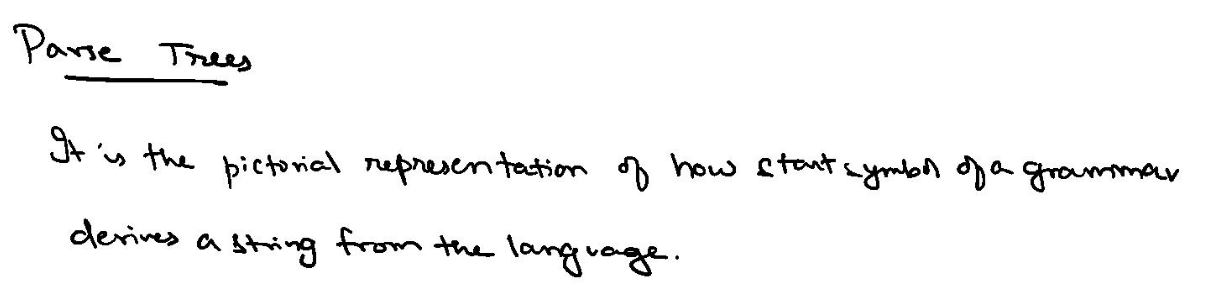

image.png -> </s># being the beginning of this time would be guaranteed</s>


In [31]:
process('asdf')

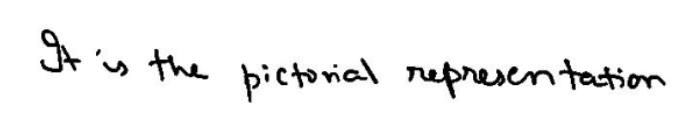

image.png -> </s>It is the pictorial representation</s>


In [32]:
process('asdf')

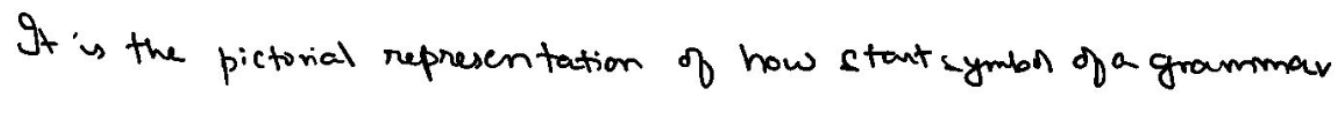

image.png -> </s>It is the pictorial representation of how stout symbol of a grammar</s>


In [33]:
process('asdf')

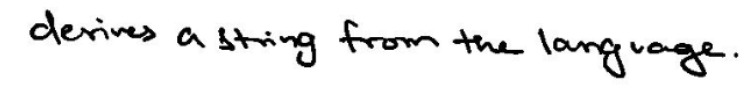

image.png -> </s>devices a string from the language .</s>


In [34]:
process('')

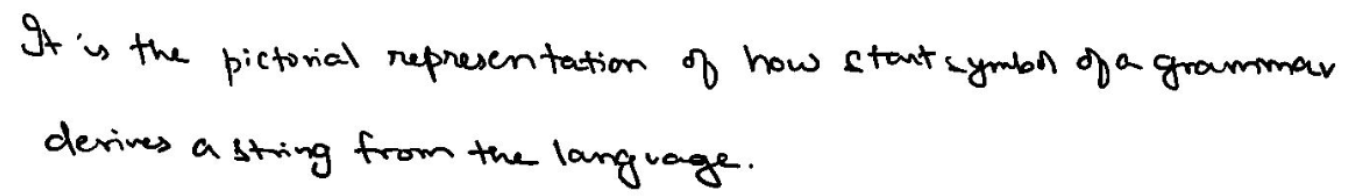

image.png -> </s>" If it is necessary to have a total number of a grammar</s>


In [36]:
process()